<a href="https://colab.research.google.com/github/nvg14/neural-networks/blob/main/breast_cancer_mlpclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from time import time
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/Breast_Cancer_Dataset - wdbc.data.csv")

In [22]:
df

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
from sklearn.model_selection import train_test_split

In [31]:
features = df.drop(columns=['Diagnosis','ID']).columns
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify = df['Diagnosis'])
train_df, val_df = train_test_split(train_df, test_size=0.05, random_state=42, stratify = train_df['Diagnosis'])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [32]:
X_train = train_df[features]
y_train = train_df['Diagnosis']

X_val = val_df[features]
y_val = val_df['Diagnosis']

X_test = test_df[features]
y_test = test_df['Diagnosis']

In [36]:
X_train

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
485,12.450,16.41,82.85,476.7,0.09514,0.15110,0.154400,0.04846,0.2082,0.07325,...,13.78,21.03,97.82,580.6,0.11750,0.40610,0.48960,0.13420,0.3231,0.10340
392,15.490,19.97,102.40,744.7,0.11600,0.15620,0.189100,0.09113,0.1929,0.06744,...,21.20,29.41,142.10,1359.0,0.16810,0.39130,0.55530,0.21210,0.3187,0.10190
356,13.050,18.59,85.09,512.0,0.10820,0.13040,0.096030,0.05603,0.2035,0.06501,...,14.19,24.85,94.22,591.2,0.13430,0.26580,0.25730,0.12580,0.3113,0.08317
264,17.190,22.07,111.60,928.3,0.09726,0.08995,0.090610,0.06527,0.1867,0.05580,...,21.58,29.33,140.50,1436.0,0.15580,0.25670,0.38890,0.19840,0.3216,0.07570
530,11.750,17.56,75.89,422.9,0.10730,0.09713,0.052820,0.04440,0.1598,0.06677,...,13.50,27.98,88.52,552.3,0.13490,0.18540,0.13660,0.10100,0.2478,0.07757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,9.667,18.49,61.49,289.1,0.08946,0.06258,0.029480,0.01514,0.2238,0.06413,...,11.14,25.62,70.88,385.2,0.12340,0.15420,0.12770,0.06560,0.3174,0.08524
31,11.840,18.70,77.93,440.6,0.11090,0.15160,0.121800,0.05182,0.2301,0.07799,...,16.82,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
473,12.270,29.97,77.42,465.4,0.07699,0.03398,0.000000,0.00000,0.1701,0.05960,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743
279,13.850,15.18,88.99,587.4,0.09516,0.07688,0.044790,0.03711,0.2110,0.05853,...,14.98,21.74,98.37,670.0,0.11850,0.17240,0.14560,0.09993,0.2955,0.06912


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [39]:
model_mlp= MLPClassifier(random_state=1, max_iter=500, alpha=0.005)
model_mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.005, max_iter=500, random_state=1)

In [44]:
from sklearn import metrics
print("Train F1_Score: ", metrics.f1_score(y_train, model_mlp.predict(X_train_scaled), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_mlp.predict(X_val_scaled), average='micro'))
print("Test F1_Score: ", metrics.f1_score(y_test, model_mlp.predict(X_test_scaled), average='micro'))

Train F1_Score:  0.9837962962962963
Val F1_Score:  0.8260869565217391
Test F1_Score:  0.8771929824561403


In [45]:
i = 0
df_acc = pd.DataFrame(columns = ['alpha','max_iter','train_acc','test_acc','train_time'])
for a in [0.00001,0.0001,0.001,0.01, 0.1, 1, 10, 0.005]:
    for mi in [10,100,200,500,1000,2000]:
        st = time()
        mlp = MLPClassifier(alpha=a, max_iter=mi)
        mlp.fit(X_train_scaled, y_train)
        end = time() - st

        acc_tr = accuracy_score(y_val, mlp.predict(X_val_scaled)) # Train Accuracy
        acc = accuracy_score(y_test, mlp.predict(X_test_scaled)) # Test Accuracy
        df_acc.loc[i] = [a,mi,acc_tr,acc,end]
        i=i+1

In [46]:
df_acc

,alpha,max_iter,train_acc,test_acc,train_time
0,0.00001,10.0,0.913043,0.938596,0.055316
1,0.00001,100.0,0.913043,0.929825,0.305236
2,0.00001,200.0,0.913043,0.921053,0.665515
3,0.00001,500.0,0.782609,0.842105,1.602609
4,0.00001,1000.0,0.782609,0.842105,3.965304
5,0.00001,2000.0,0.826087,0.885965,2.399793
6,0.00010,10.0,0.913043,0.956140,0.035020
7,0.00010,100.0,0.913043,0.938596,0.327502
8,0.00010,200.0,0.913043,0.929825,0.606884
9,0.00010,500.0,0.782609,0.842105,1.545424


In [47]:
from time import time

In [48]:
acc = []
acc_tr = []
timelog = []
for l in [10,20,50,100,200,500,1000]:
    t = time()
    mlp = MLPClassifier(alpha=0.001, max_iter=10, hidden_layer_sizes=(l,))
    mlp.fit(X_train_scaled, y_train)
    endt = time() - t
    a_tr = accuracy_score(y_val, mlp.predict(X_val_scaled))
    a = accuracy_score(y_test, mlp.predict(X_test_scaled))

    acc_tr.append(a_tr)
    acc.append(a)
    timelog.append(endt)

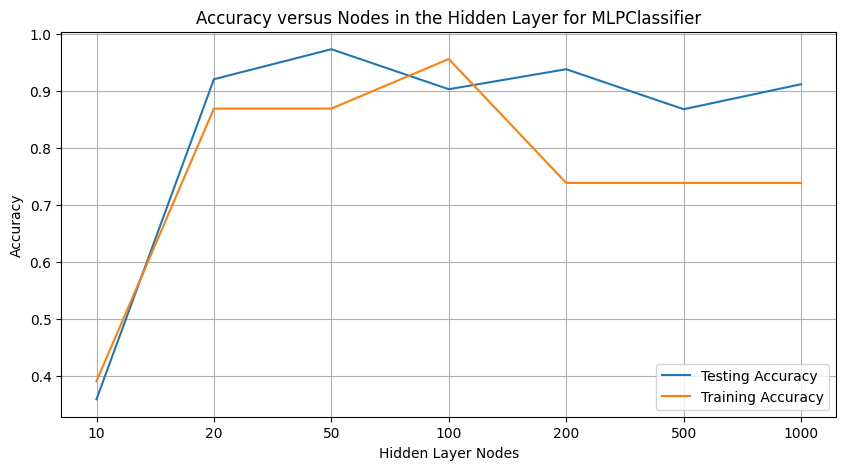

In [49]:
l = [10,20,50,100,200,500,1000]
N = len(l)
l2 = np.arange(N)
matplot.subplots(figsize=(10, 5))
matplot.plot(l2, acc, label="Testing Accuracy")
matplot.plot(l2, acc_tr, label="Training Accuracy")
matplot.xticks(l2,l)
matplot.grid(True)
matplot.xlabel("Hidden Layer Nodes")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus Nodes in the Hidden Layer for MLPClassifier', fontsize=12)
matplot.show()

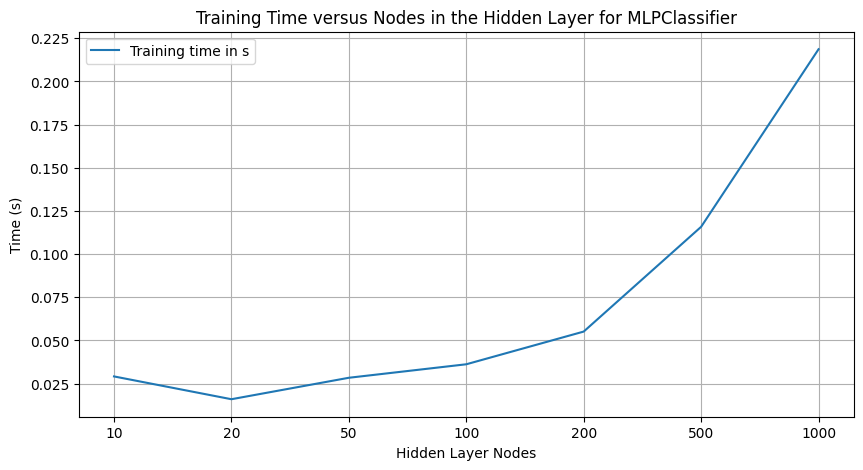

In [50]:
l = [10,20,50,100,200,500,1000]
N = len(l)
l2 = np.arange(N)
matplot.subplots(figsize=(10, 5))
matplot.plot(l2, timelog, label="Training time in s")
matplot.xticks(l2,l)
matplot.grid(True)
matplot.xlabel("Hidden Layer Nodes")
matplot.ylabel("Time (s)")
matplot.legend()
matplot.title('Training Time versus Nodes in the Hidden Layer for MLPClassifier', fontsize=12)
matplot.show()